In [1]:

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error
import os
from sklearn.preprocessing import MinMaxScaler
from dynamics import *
import re
import math

In [ ]:
# Precompute embeddings for all readouts
def precompute_embeddings(datapoints_normalized):
    simulator = RydbergSimulator(
        nsites=nsites,
        atoms=atoms,
        readouts=readouts,
        omega=omega,
        t_start=t_start,
        t_end=t_end,
        t_step=t_step,
        t_rate=t_rate,
        alpha=alpha,
        V_matrix=V_matrix,
        id=0,
        use_wavelet=False
    )
    embeddings = simulator.apply_layer(datapoints_normalized)
    return readouts, embeddings

In [18]:
train_datapoints = np.random.rand(100, 2)
train_outcomes = np.random.rand(100)

In [19]:
nsites =3
d = 10 # 10 micron spacing
atoms = np.linspace(0, (nsites - 1) * d, nsites)  # Put atoms in a chain with 10 micron spacing

# Hyperparameters for testing
omega = 2 * np.pi
t_start = 0.0
t_end = 5.0
t_step = 0.5
t_rate = 1.0
alpha = np.random.rand(nsites)  # Random site modulation factors between 0 and 1
V_matrix = np.random.rand(nsites, nsites)
V_matrix = (V_matrix + V_matrix.T) / 2  # Make the interaction matrix symmetric
np.fill_diagonal(V_matrix, 0.1)  # Set diagonal elements to 0.1
#use min-max normalization
scaler = MinMaxScaler(feature_range=(-1, 1))
train_datapoints_normalized = scaler.fit_transform(train_datapoints)

custom_readouts = ["ZZZ", "YYY", "XXX", "YII", "XYZ"]
readouts = generate_readouts(nsites, custom_readouts)
readouts, train_embeddings = precompute_embeddings(train_datapoints_normalized)

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:35<00:00,  2.85it/s]


In [20]:
t_steps = np.arange(t_step, t_end+t_step, t_step)
#reshape the embeddings to be in the shape of (n_samples, len(t_steps), :))
embd_per_t = train_embeddings.reshape(train_embeddings.shape[0], len(t_steps), -1)

The original value of the sample is:  0.4352419656081792


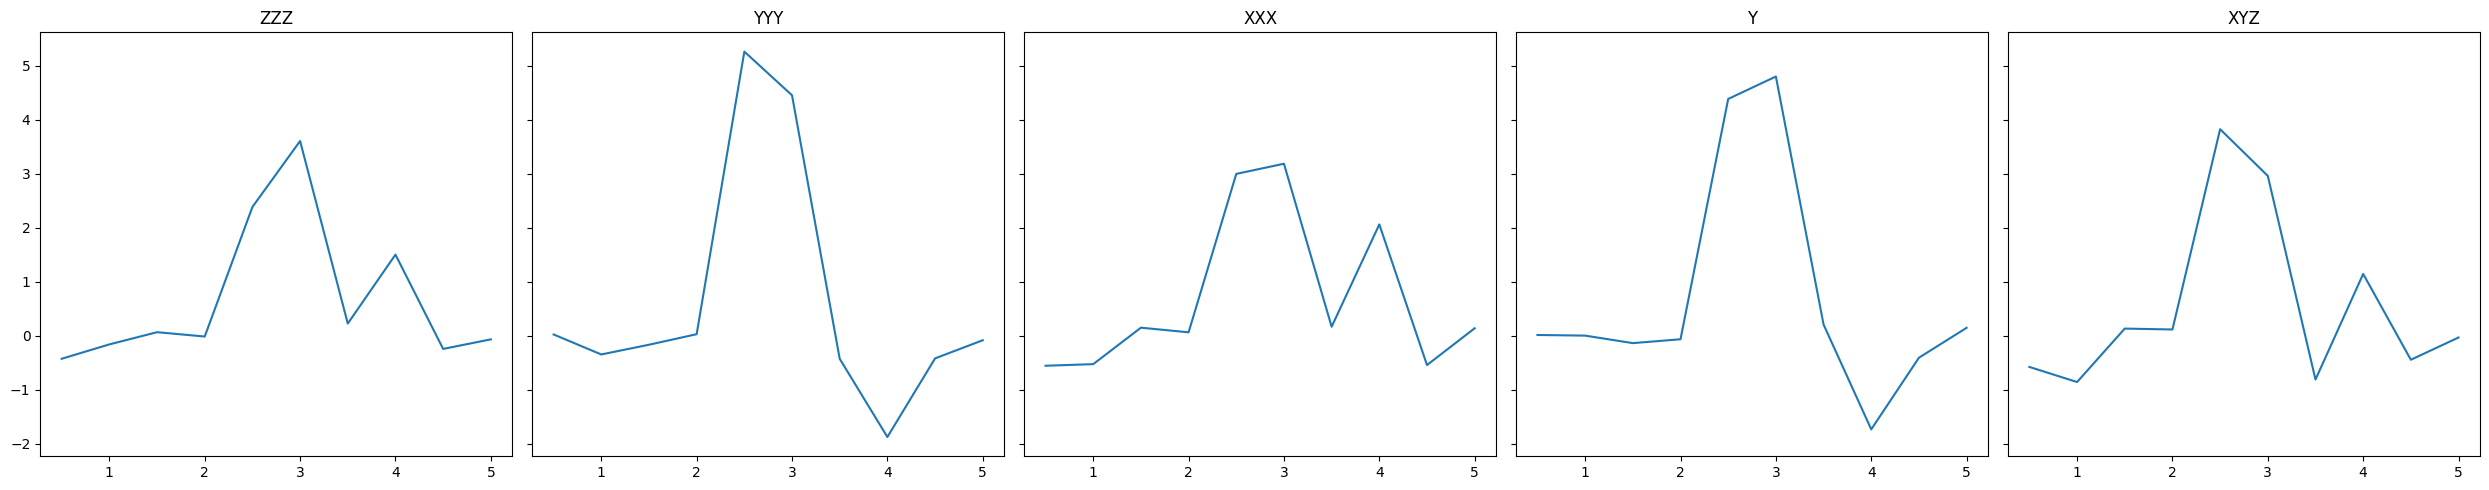

In [22]:
#visualize the expectaion values of all the readouts one by one
smple_idx = 58
print("The original value of the sample is: ", train_outcomes[smple_idx])

# Define the number of rows and columns
num_readouts = len(readouts)
rows = 1  # Example: Number of rows
cols = math.ceil(num_readouts / rows)  # Calculate the required number of columns

# Create subplots with a grid layout
fig, axs = plt.subplots(rows, cols, figsize=(cols * 5, rows * 5), sharey=True)

# Flatten the axs array for easier indexing if it's multidimensional
axs = axs.flatten()

for i, readout in enumerate(readouts):
    axs[i].plot(t_steps, embd_per_t[smple_idx, :, i])
    title = re.search(r"[IXYZ]+", readout.to_string()).group()
    axs[i].set_title(title)

# Hide any unused subplots
for j in range(len(readouts), len(axs)):
    axs[j].axis('off')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()



In [98]:
readouts[-5].to_string()

'[1+0j] IIX\n'